# Native's attitude toward Immigrants

Inspired by [Baker, Bloom, and Davis (2016)](https://academic.oup.com/qje/article/131/4/1593/2468873), this project constructs metrics of native's attitude toward immigrants using historical newspaper data from the [Library of Congress](https://chroniclingamerica.loc.gov/). This project constructs two metrics: 
1. One using the normalized count of articles discussed immigration topic. Articles that referred immigrants as newcomers are counted as favorable attitude toward newcomers while those included one of the following negative words are counted as anti-immigration: {*anxiety; panic; fear; crime; terror; worry; concern; violent; illegal; undesired; excluded; fraud; outrage; prevent; prohibit; epidemic; foreigner*}. The set of negative words are mostly picked from the wordcloud of words using in these historical articles.
2. One using the sentiment score of adjustive words in the neighborhood of 10 words surrounding a word in the set {immigrant; migration; and similar}. The sentiment score comes from [SentiWords](https://hlt-nlp.fbk.eu/technologies/sentiwords)


## Count of newspaper articles
In order to count newspaper articles contained certain keywords, I use the provided search API with result in json format. The first element of each search query gives us the number of article such keywords. In the code section below, **anywords** variable contain all the words (stemmed words to be specific) such that if any of them appeared in an article, the search query then returns that article. Similarly, **allwords** are words such that the search query returns article that had all of those words.

With this, I construct two alternative that measure native's attitude toward immigrants -- the **Anti-immigrant Index** and the **Newcomer Index**. These indices are simply count of favorable and non-favorable newspaper articles described above and divided by the total count of all newspaper articles that discuss the topic of immigration.

As can be seen, there were sharp declines in the **Newcomer Index** in 1940s and early 1960s which coincide with the sharp increase of the **Anti-immigrant Index**. Recall that in 1941 Japan's attack and Pearl Harbor shocked the American public and as a result, 1,000 Japanese community leader were incarcerated. In 1959, Fidel Castro's Cuba revolution prompted more than 200,000 people to emigrate to the US in the next three years and the number of families migrated to the US reach 409,000 in 1970.

In [14]:
t0 = 1900
t1 = 1963
imm_count = np.zeros(t1-t0+1)
immnc_count = np.zeros(t1-t0+1)
immfear_count = np.zeros(t1-t0+1)

for i in range(t1-t0+1):
    anywords = 'immigr+migra'
    allwords = ''
    phrase = ''
    url = 'https://chroniclingamerica.loc.gov/search/pages/results/?dateFilterType=yearRange&date1='+\
    str(t0+i)+'&date2=' + str(t0+i) + '&language=eng&ortext='+\
    anywords + '&andtext='+ allwords +'&phrasetext=' + phrase + '&format=json&rows=1'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    data = json.loads(webpage)
    imm_count[i] = data['totalItems']
    
    anywords = ''
    allwords = 'immigr+newcomer'
    phrase = ''
    url = 'https://chroniclingamerica.loc.gov/search/pages/results/?dateFilterType=yearRange&date1='+\
    str(t0+i)+'&date2=' + str(t0+i) + '&language=eng&ortext='+\
    anywords + '&andtext='+ allwords +'&phrasetext=' + phrase + '&format=json&rows=1'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    data = json.loads(webpage)
    immnc_count[i] = data['totalItems']
    
    anywords = 'anxiety+panic+fear+crime+terror+worry+concern+violen'+\
            'illegal+undesir+exclud+fraud+outrage+prevent+prohib+epidemic+foreigner'
    allwords = 'immigr'
    phrase = ''
    url = 'https://chroniclingamerica.loc.gov/search/pages/results/?dateFilterType=yearRange&date1='+\
        str(t0+i)+'&date2=' + str(t0+i) + '&language=eng&ortext='+\
        anywords + '&andtext='+ allwords +'&phrasetext=' + phrase + '&format=json&rows=1'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    data = json.loads(webpage)
    immfear_count[i] = data['totalItems']

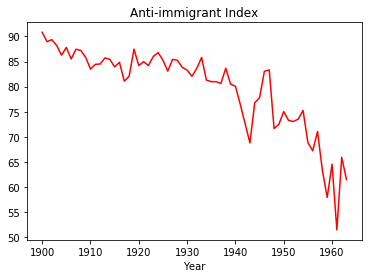

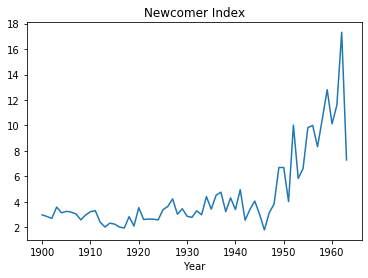

In [15]:
time = np.array(range(t0,t1+1))
import matplotlib.pyplot as plt

plt.plot(time,immfear_count/imm_count*100, 'r')
plt.title('Anti-immigrant Index')
plt.xlabel('Year')
plt.show()
plt.plot(time,immnc_count/imm_count*100)
plt.title('Newcomer Index')
plt.xlabel('Year')
plt.show()

## Sentiment toward immigrants
Count of newspaper articles is one way to measure native's attitude toward immigrants. It, however, words that are carefully selected that are context and time relevant. What if there was a shift toward the usage of the word **friend** instead of **newcomer** in articles favored immigration? 

A different and more generalized measure is the sentiment of words that used in these articles. For each article, I search for an adjective within a neighborhood of 10 words from the word of interest, e.g. **immigrant, migration**, and use the sentiment score provided by [SentiWords](https://hlt-nlp.fbk.eu/technologies/sentiwords) to rate the sentiment of each article. The average sentiment of all articles within a year is considered the a measure of native's attitude toward immigrants in that period. The variance of the sentiment score is considered as the polarization of native's attitude toward immigrants.

Due to the massive size of the dataset, the search query returns *TimeOut* error most of the time and hence, I decided to download the entire data set that contains the word **immigrant** for convenience. The entire data set of articles in text format is roughly 30GB. The python code to download the data set is included in the end of this write up for reference.

Shown below are the Sentiment Indices of native's attitude toward immigrants measured using the first 500 articles returned from the search query (this limit is set due to the limitation of my computational power at the moment). The two indices are computed using sentiment scores provided by [SentiWords](https://hlt-nlp.fbk.eu/technologies/sentiwords) which built on top of [SentiWordNet](https://github.com/aesuli/sentiwordnet) (provided for reference). 

These indices provide a slightly different picture than before. The native's attitude toward immigrants seem to have declined after 1920 (after WW1) coincidence with the time Congress passed the National Origin Formula that limit immigration by country of origin. The increment of public sentiment toward immigrant after 1940 is also consistent with the earlier metrics. It's also worth noting of the sharp decline in the Polarization Indices at the end of WW1 and generally decline with respect to time.

In [ ]:
nlp.max_length = 7000000
files = []
path = '/Volumes/Untitled/LibraryCongress/'
t0 = 1900
t1 = 1964
agg_senti = np.zeros(t1-t0)
agg_senti2 = np.zeros(t1-t0)
sd_senti = np.zeros(t1-t0)
sd_senti2 = np.zeros(t1-t0)
for i in range(t0,t1):
    count = 0
    count2 = 0
    print(i)
    for j in os.listdir(path):
        if os.path.isfile(os.path.join(path,j)) and ('year'+str(i)) in j:
            with open(os.path.join(path,j), encoding='ISO-8859-1') as json_file:
                count2 += 1
                print(count2)
                if count2<=5:
                    data = json.load(json_file)
                    text = clean_text(data)
                    AN = adj_noun(text)
                    for x in AN:
                        try:
                            temp = swn.senti_synset(x[1].text + '.a.01')
                            agg_senti[i-t0] = agg_senti[i-t0] + temp.pos_score() - temp.neg_score()
                            agg_senti2[i-t0] = agg_senti2[i-t0] + [float(y[1]) for y in SentiWords if y[0]==(x[1].text + '#a')][0] 
                            sd_senti[i-t0] = sd_senti[i-t0] + np.power(temp.pos_score() - temp.neg_score(),2)
                            sd_senti2[i-t0] = sd_senti2[i-t0] + np.power(temp.pos_score() - temp.neg_score(),2)
                            count = count+1
                        except Exception:
                            pass
    if count>0:
        agg_senti[i-t0] = agg_senti[i-t0]/count
        agg_senti2[i-t0] = agg_senti2[i-t0]/count
        sd_senti[i-t0] = np.power(sd_senti[i-t0]/count-np.power(agg_senti[i-t0],2),0.5)
        sd_senti2[i-t0] = np.power(sd_senti2[i-t0]/count-np.power(agg_senti2[i-t0],2),0.5)

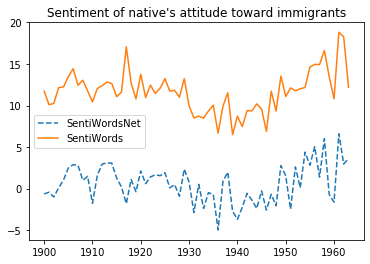

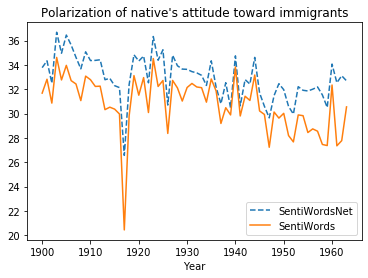

In [12]:
#Plot
time = np.array(range(t0,t1))

plt.plot(time,agg_senti*100,'--')
plt.plot(time,agg_senti2*100)
plt.legend(('SentiWordsNet', 'SentiWords'))
plt.title('Sentiment of native\'s attitude toward immigrants')
plt.show()
plt.plot(time,sd_senti*100,'--')
plt.plot(time,sd_senti2*100)
plt.legend(('SentiWordsNet', 'SentiWords'))
plt.title('Polarization of native\'s attitude toward immigrants')
plt.xlabel('Year')
plt.show()

## Relevant packages
Below are relevant packages and functions used in this project.

In [2]:
#Loading relevant packages
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen
import numpy as np
import nltk
import string
import spacy
import enchant
#nltk.download('averaged_perceptron_tagger')
#python -m spacy download en
nlp = spacy.load('en')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import sentiwordnet as swn
#Common words
from nltk.corpus import stopwords
common = set(stopwords.words('english'))
#English dictionary
import enchant
d = enchant.Dict("en_US")
#WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# SentiWords
with open('SentiWords_1.1.txt') as f:
    x = f.readlines()
SentiWords = []
for y in x:
    z = y.split()
    SentiWords.append(z)

In [ ]:
#Mining data
def url_open(url):
    from urllib.request import Request, urlopen
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    retrycount = 0
    s = None
    while s is None:
        try:
            s = urlopen(req,timeout=200).read()
        except urllib.request.HTTPError as e:
            print(str(e))
            retrycount+=1
    return json.loads(s)
t0 = 1789
t1 = 1963
for i in range(t1-t0+1):
    anywords = 'immigr+migra'
    allwords = ''
    phrase = ''
    total = 1
    url = 'https://chroniclingamerica.loc.gov/search/pages/results/?dateFilterType=yearRange&date1='+\
    str(t0+i)+'&date2=' + str(t0+i) + '&language=eng&ortext='+\
    anywords + '&andtext='+ allwords +'&phrasetext=' + phrase + '&format=json&rows=' + str(total)
    data = url_open(url)
    total = max(data['totalItems'],1)
    if total>100:
        for j in range(int(np.ceil(total/100))):
            url = 'https://chroniclingamerica.loc.gov/search/pages/results/?dateFilterType=yearRange&date1='+\
            str(t0+i)+'&date2=' + str(t0+i) + '&language=eng&ortext='+\
            anywords + '&andtext='+ allwords +'&phrasetext=' + phrase + '&format=json&rows=100&page='+str(j+1)
            data = url_open(url)
            filename = 'year'+str(t0+i)+'-'+str(j)+'.json'
            with open(filename,'w') as json_file:
                json.dump(data, json_file)

In [ ]:
#Define function to clean text and find adjustive
def clean_text(data):
    text = ''
    for i in range(data['endIndex']-data['startIndex']+1):
        text = text + data['items'][i]['ocr_eng']
    text1 = text.replace('\n','')
    text1 = text1.lower()
    return text1
def adj_noun(text3):
    doc = nlp(text3)
    noun_adj_pairs = []
    eps = 10
    for i,token in enumerate(doc):
        imm_text = {'migration','migrate','immigrant','immigrants','immigration',\
                              'immigrations', 'immigrate','immigrated','immigrates','immigrating',\
                              'migrant','migrants','migrated','migrating','emigrate','emigrates','emigrated'}
        if token.text not in imm_text:
            continue
        for j in range(i+1,min(len(doc),i + eps)):
            if doc[j].pos_ == 'ADJ' and d.check(doc[j].text) and (doc[j].text not in imm_text):
                noun_adj_pairs.append((token,doc[j]))
                break
        for j in range(i,max(0,i - eps), -1):
            if doc[j].pos_ == 'ADJ' and d.check(doc[j].text) and (doc[j].text not in imm_text):
                noun_adj_pairs.append((token,doc[j]))
                break
    return noun_adj_pairs